<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Lab8/Lab8part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/CE888_2020.git

Cloning into 'CE888_2020'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 25162 (delta 36), reused 4 (delta 0), pack-reused 25082
Receiving objects: 100% (25162/25162), 562.19 MiB | 43.49 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [2]:
import os

os.environ['KAGGLE_USERNAME'] = "thiviyannanthakumar" # username from the json file

os.environ['KAGGLE_KEY'] = "db6a2de7496e7641f57e6c1b19007a51" # key from the json file

!kaggle competitions download -c dogs-vs-cats # api copied from kaggle



100% 543M/543M [00:05<00:00, 132MB/s]
100% 543M/543M [00:05<00:00, 112MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 86.5MB/s]
 98% 265M/271M [00:02<00:00, 141MB/s]
100% 271M/271M [00:02<00:00, 123MB/s]


In [3]:


from zipfile import ZipFile
file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall() 
  print('done')


done


In [0]:
!mkdir train/cats
!mkdir train/dogs
!mv train/cat.*.jpg train/cats/
!mv train/dog.*.jpg train/dogs/



In [5]:
!pip install tensorflow==1.3.0
!pip install keras==2.0.7

     |████████████████████████████████| 43.6MB 60kB/s 
     |████████████████████████████████| 1.6MB 41.7MB/s 
     |████████████████████████████████| 890kB 52.9MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=a293e5a5986b6ed54b974c83eca0e3a36afcb1a53532a650f188eb6f888f0961
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but you'll have tensorflow 1.3.0 which is incompatible.
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.3.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.0
    Uninstalling bleach-3.1.0:
      Successfully uninstalled bleach-3.1.0
  Found existing installation: tensorflow 1.15.0
    Uninst

In [6]:
import numpy as np
import os
import time
from CE888_2020.Lab_8.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

In [7]:
#%% Load an elephant image as an example and see the image-processing

img_path = '/content/CE888_2020/Lab_8/elephant.jpg' # image name
img = image.load_img(img_path, target_size=(224, 224)) # load image
x = image.img_to_array(img) # convert image to array
print (x.shape)
x = np.expand_dims(x, axis=0) # expand dimension
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)

(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [0]:
#%% Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/train'
data_dir_list = os.listdir(data_path)


In [0]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)

In [10]:
img_list

['dog.6800.jpg',
 'dog.6749.jpg',
 'dog.6589.jpg',
 'dog.5597.jpg',
 'dog.1642.jpg',
 'dog.8309.jpg',
 'dog.11057.jpg',
 'dog.2479.jpg',
 'dog.2195.jpg',
 'dog.8198.jpg',
 'dog.6562.jpg',
 'dog.628.jpg',
 'dog.6216.jpg',
 'dog.4362.jpg',
 'dog.3832.jpg',
 'dog.142.jpg',
 'dog.4714.jpg',
 'dog.1993.jpg',
 'dog.606.jpg',
 'dog.1076.jpg',
 'dog.2170.jpg',
 'dog.12415.jpg',
 'dog.3928.jpg',
 'dog.5270.jpg',
 'dog.10848.jpg',
 'dog.12424.jpg',
 'dog.6546.jpg',
 'dog.10835.jpg',
 'dog.6849.jpg',
 'dog.655.jpg',
 'dog.9051.jpg',
 'dog.7880.jpg',
 'dog.6903.jpg',
 'dog.1838.jpg',
 'dog.9129.jpg',
 'dog.7273.jpg',
 'dog.10963.jpg',
 'dog.8259.jpg',
 'dog.4392.jpg',
 'dog.9807.jpg',
 'dog.10675.jpg',
 'dog.2989.jpg',
 'dog.1887.jpg',
 'dog.2949.jpg',
 'dog.6764.jpg',
 'dog.11978.jpg',
 'dog.7611.jpg',
 'dog.459.jpg',
 'dog.11584.jpg',
 'dog.7804.jpg',
 'dog.10609.jpg',
 'dog.7388.jpg',
 'dog.9464.jpg',
 'dog.1818.jpg',
 'dog.2191.jpg',
 'dog.1776.jpg',
 'dog.9394.jpg',
 'dog.7254.jpg',
 'dog.117

In [11]:
img_data_list=[] # created an empty list for images to be loaded

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    img_list=img_list[:1000]
    
    for img in img_list:
	  #print('Loaded the images of dataset-'+'{}\n'.format(dataset))
	  #for img in img_list:
      img_path = data_path + '/'+ dataset + '/'+ img
      img = image.load_img(img_path, target_size=(224, 224))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      img_data_list.append(x)
		  #img = image.load_img(img_path, target_size=(224, 224))
		  #x = image.img_to_array(img)
		  #x = np.expand_dims(x, axis=0)
		  #x = preprocess_input(x)
#		x = x/255
		# print('Input image shape:', x.shape)
		  #img_data_list.append(x)
    

#%% 
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(2000, 1, 224, 224, 3)
(1, 2000, 224, 224, 3)
(2000, 224, 224, 3)


In [12]:
# Define the number of classes
num_classes = 2
print(img_data.shape[0])
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:1000]=0
labels[1000:]=1


names = ['cats','dogs']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

2000


In [13]:
image_input = Input(shape=(224, 224, 3)) # shape of a single image

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet') # load VGG-16 model with 'top = true'
model.summary()

552460288/553467096 [============================>.] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (M

In [14]:
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable
custom_vgg_model.summary()

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:
t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=2, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 1600 samples, validate on 400 samples
Epoch 1/2
1600/1600 [==============================] - 204s - loss: 0.1275 - acc: 0.9581 - val_loss: 0.0696 - val_acc: 0.9825
Epoch 2/2
1600/1600 [==============================] - 194s - loss: 0.0300 - acc: 0.9869 - val_loss: 0.0729 - val_acc: 0.9825
Training time: -399.77682185173035
400/400 [==============================] - 39s    
[INFO] loss=0.0729, accuracy: 98.2500%


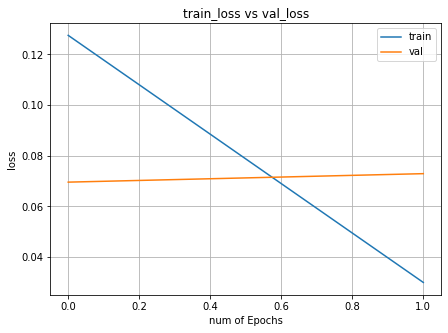

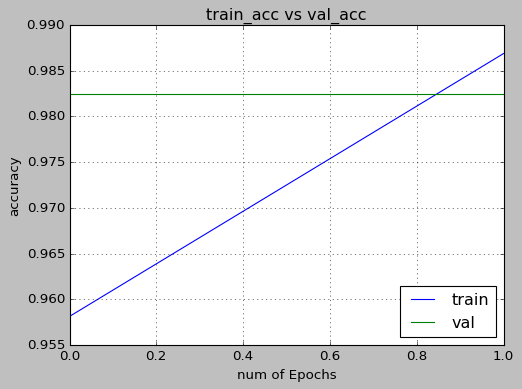

In [17]:
#%% plot
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(2)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])